In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Tensorflow Stuff
import tensorflow.keras.initializers
import statistics
import tensorflow.keras as keras
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, InputLayer
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.layers import ReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [6]:
energies = np.linspace(1, 20000, 2000)
for energy in energies:
    print("neutron " , energy, " keV 100000")

neutron  1.0  keV 100000
neutron  11.004502251125563  keV 100000
neutron  21.009004502251127  keV 100000
neutron  31.01350675337669  keV 100000
neutron  41.018009004502254  keV 100000
neutron  51.02251125562782  keV 100000
neutron  61.02701350675338  keV 100000
neutron  71.03151575787895  keV 100000
neutron  81.03601800900451  keV 100000
neutron  91.04052026013007  keV 100000
neutron  101.04502251125564  keV 100000
neutron  111.0495247623812  keV 100000
neutron  121.05402701350675  keV 100000
neutron  131.0585292646323  keV 100000
neutron  141.0630315157579  keV 100000
neutron  151.06753376688346  keV 100000
neutron  161.07203601800902  keV 100000
neutron  171.07653826913457  keV 100000
neutron  181.08104052026013  keV 100000
neutron  191.08554277138572  keV 100000
neutron  201.09004502251128  keV 100000
neutron  211.09454727363683  keV 100000
neutron  221.0990495247624  keV 100000
neutron  231.10355177588795  keV 100000
neutron  241.1080540270135  keV 100000
neutron  251.1125562781391

neutron  5843.629314657329  keV 100000
neutron  5853.633816908455  keV 100000
neutron  5863.6383191595805  keV 100000
neutron  5873.642821410705  keV 100000
neutron  5883.647323661831  keV 100000
neutron  5893.651825912957  keV 100000
neutron  5903.656328164083  keV 100000
neutron  5913.660830415208  keV 100000
neutron  5923.665332666334  keV 100000
neutron  5933.669834917459  keV 100000
neutron  5943.674337168584  keV 100000
neutron  5953.67883941971  keV 100000
neutron  5963.683341670836  keV 100000
neutron  5973.687843921962  keV 100000
neutron  5983.692346173087  keV 100000
neutron  5993.6968484242125  keV 100000
neutron  6003.701350675338  keV 100000
neutron  6013.705852926463  keV 100000
neutron  6023.710355177589  keV 100000
neutron  6033.714857428715  keV 100000
neutron  6043.719359679841  keV 100000
neutron  6053.7238619309655  keV 100000
neutron  6063.728364182091  keV 100000
neutron  6073.732866433217  keV 100000
neutron  6083.737368684343  keV 100000
neutron  6093.741870935

neutron  10845.880440220111  keV 100000
neutron  10855.884942471237  keV 100000
neutron  10865.889444722361  keV 100000
neutron  10875.893946973487  keV 100000
neutron  10885.898449224613  keV 100000
neutron  10895.902951475739  keV 100000
neutron  10905.907453726864  keV 100000
neutron  10915.91195597799  keV 100000
neutron  10925.916458229116  keV 100000
neutron  10935.92096048024  keV 100000
neutron  10945.925462731366  keV 100000
neutron  10955.929964982492  keV 100000
neutron  10965.934467233617  keV 100000
neutron  10975.938969484743  keV 100000
neutron  10985.943471735869  keV 100000
neutron  10995.947973986995  keV 100000
neutron  11005.95247623812  keV 100000
neutron  11015.956978489245  keV 100000
neutron  11025.96148074037  keV 100000
neutron  11035.965982991496  keV 100000
neutron  11045.970485242622  keV 100000
neutron  11055.974987493748  keV 100000
neutron  11065.979489744874  keV 100000
neutron  11075.983991996  keV 100000
neutron  11085.988494247124  keV 100000
neutron

neutron  16378.370185092548  keV 100000
neutron  16388.374687343672  keV 100000
neutron  16398.379189594798  keV 100000
neutron  16408.383691845924  keV 100000
neutron  16418.38819409705  keV 100000
neutron  16428.392696348175  keV 100000
neutron  16438.3971985993  keV 100000
neutron  16448.401700850427  keV 100000
neutron  16458.406203101553  keV 100000
neutron  16468.41070535268  keV 100000
neutron  16478.415207603804  keV 100000
neutron  16488.41970985493  keV 100000
neutron  16498.424212106052  keV 100000
neutron  16508.42871435718  keV 100000
neutron  16518.433216608304  keV 100000
neutron  16528.43771885943  keV 100000
neutron  16538.442221110556  keV 100000
neutron  16548.44672336168  keV 100000
neutron  16558.451225612807  keV 100000
neutron  16568.455727863933  keV 100000
neutron  16578.46023011506  keV 100000
neutron  16588.464732366185  keV 100000
neutron  16598.46923461731  keV 100000
neutron  16608.473736868436  keV 100000
neutron  16618.478239119562  keV 100000
neutron  1

In [77]:
with open('keVtoLightYield.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [78]:
# Takes index from 
indexToKey = [key for key in data.keys() if key not in "bins"]
indexToKey.sort()
indexToKey = np.array(indexToKey)
    
# Gets the dimensions of the x and y data
xDim = len(data[indexToKey[0]])
yDim = len(indexToKey)

def loadRandomGaussianData(data, num):

    # Normalizes the data
    def normalize(counts):
        bins = data["bins"]
        binWidth = bins[1] - bins[0]
        counts = counts / ( binWidth * sum(counts) )
        return counts

    # Randomly adds a gaussian peak to a 1D array
    def addGaussian(data, i):
        # Randomly picks the width and height of the gaussian
        # ~8 is placeholder for typical width of peak in the real-world data (depends on detector resolution)
        H = np.random.normal(loc = 20.0, scale = 10.0)
        W = int( np.abs(np.random.normal(loc = 30.0, scale = 15.0 / (np.abs(H) + 0.01) ))) + 1

        for k in range(-W, W + 1):
            if (i + k) >= len(data):
                break
            elif (i + k) < 0:
                continue
            else:
                data[i + k] += H * np.exp(- (2.5*k/W)**2)
                
    # Gets the detector response of a given neutron spectra
    def getX(yRow):
        xRow = np.zeros(xDim)
        for index in range(yDim):
            xRow += yRow[index] * data[indexToKey[index]]
            
        return normalize(xRow)
          
    x = np.zeros( (0, xDim) )
    y = np.zeros( (0, yDim) )
    #14045
    for _ in range(2000):
        yRow = np.zeros(len(indexToKey))

        i = np.random.randint(low = 0, high = yDim + 1)
        addGaussian(yRow, i)
        
        # Flip a coin and keep adding gaussian spikes
        p = np.random.random()
        while p > 0.2:
            i = np.random.randint(low = 0, high = yDim + 1)
            addGaussian(yRow, i)
            p = np.random.random()
                
        yRow = np.abs(yRow)
        yRow = yRow / sum(yRow)
        xRow = getX(yRow)

        x = np.vstack( (x, xRow) )
        y = np.vstack( (y, yRow) )    

    return x,y

In [8]:
# Gets x and y dimension of the data 
indexToKey = [key for key in data.keys() if key not in "bins"]
indexToKey.sort()
indexToKey = np.array(indexToKey)

xDim = len(data[indexToKey[0]])
yDim = len(indexToKey)
    
def bootstrapModel(numNeurons0, numNeurons1, numNeurons2, alpha0, alpha1, alpha2, dropout):
    
    error = []
    
    for _ in range(1):
        model = getModel(xDim, yDim, numNeurons0, numNeurons1, numNeurons2, alpha0, alpha1, alpha2, dropout)
        model.compile(loss = "categorical_crossentropy", optimizer = Adam() )

        monitor = EarlyStopping(monitor='val_loss', min_delta=1e-7, 
                                patience=1, verbose=0,
                                mode='min', restore_best_weights=True)

        x,y = loadRandomGaussianData(data, 400)
        
        model.fit(x, y, validation_split = 0.05, batch_size = 60, callbacks=[monitor], verbose=0, epochs=10000)

        xtest, ytest = loadRandomGaussianData(data, 100)
        ypred = model( xtest )
        error.append( metrics.mean_squared_error(ytest, ypred) )
        
    print( "Error : " , np.mean(error), " ± ", np.std(error) )
    return - np.mean( error )

def getModel(xDim, yDim, numNeurons0, numNeurons1, numNeurons2, alpha0, alpha1, alpha2, dropout):
    
    numNeurons0 = int( numNeurons0 )
    numNeurons1 = int( numNeurons1 )
    numNeurons2 = int( numNeurons2 )
    
    model = keras.Sequential()
    model.add(keras.Input(xDim))
    if numNeurons0 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons0, activation=keras.layers.LeakyReLU(alpha = alpha0)))
    if numNeurons1 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons1, activation=keras.layers.LeakyReLU(alpha = alpha1)))
    if numNeurons2 >= 1:
        model.add(Dropout(dropout))
        model.add(Dense(numNeurons2, activation=keras.layers.LeakyReLU(alpha = alpha2)))
        
    model.add(Dense(yDim, activation = 'softmax'))
    return model
    
    

In [9]:
pbounds = {'numNeurons0' : (200,600),
           'numNeurons1' : (200,600), 
           'numNeurons2' : (200,600), 
           'alpha0' : (0, 0.9), 
           'alpha1' : (0, 0.9), 
           'alpha2' : (0, 0.9), 
           'dropout': (0, 0.2)
           }
optimizer = BayesianOptimization(
    f=bootstrapModel,
    pbounds=pbounds,
    verbose=2,
    random_state=1
)

optimizer.maximize(init_points=150, n_iter=50)

print("Best Value : " , optimizer.max)
Best = optimizer.max

|   iter    |  target   |  alpha0   |  alpha1   |  alpha2   |  dropout  | numNeu... | numNeu... | numNeu... |
-------------------------------------------------------------------------------------------------------------
Error :  1.00463864181284e-05  ±  0.0
|  1        | -1.005e-0 |  0.3753   |  0.6483   |  0.000102 |  0.06047  |  258.7    |  236.9    |  274.5    |
Error :  1.1818209038885991e-05  ±  0.0
|  2        | -1.182e-0 |  0.311    |  0.3571   |  0.4849   |  0.08384  |  474.1    |  281.8    |  551.2    |
Error :  1.757642081863727e-05  ±  0.0
|  3        | -1.758e-0 |  0.02465  |  0.6034   |  0.3756   |  0.1117   |  256.2    |  279.2    |  520.3    |
Error :  1.1621810384683296e-05  ±  0.0
|  4        | -1.162e-0 |  0.8714   |  0.2821   |  0.6231   |  0.1753   |  557.8    |  234.0    |  215.6    |
Error :  1.440679174971738e-05  ±  0.0
|  5        | -1.441e-0 |  0.1528   |  0.7903   |  0.08851  |  0.08422  |  583.2    |  413.3    |  476.8    |
Error :  9.545510488488222e-06  ± 

KeyboardInterrupt: 

In [33]:
Best = {'target': -0.0002807046020602577, 
        'params': {
            'numNeurons0': 532.5106601410772, 
            'numNeurons1': 341.60973480326476, 
            'numNeurons2': 439.0057187408672,
            'dropout'    : 0.01841923339536132,
            'alpha0': 0.13, 
            'alpha1': 0.23,
            'alpha2': 0.27
             }}

alpha0 = Best['params']['alpha0']
alpha1 = Best['params']['alpha1']
alpha2 = Best['params']['alpha2']
dropout = Best['params']['dropout']
numNeurons0 = Best['params']['numNeurons0']
numNeurons1 = Best['params']['numNeurons1']
numNeurons2 = Best['params']['numNeurons2']

indexToKey = [key for key in data.keys() if key not in "bins"]
indexToKey.sort()
indexToKey = np.array(indexToKey)

xDim = len(data[indexToKey[0]])
yDim = len(indexToKey)

model = getModel(xDim, yDim, numNeurons0, numNeurons1, numNeurons2, alpha0, alpha1, alpha2, dropout)

model.compile(loss = "categorical_crossentropy", optimizer = Adam() )

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-8, 
                        patience=10, verbose=0,
                        mode='min', restore_best_weights=True)

x,y = loadRandomGaussianData(data, 10000)
        
model.fit(x, y, validation_split=0.1, batch_size = 120, callbacks=[monitor], verbose=0, epochs=10000)

In [21]:
meanErr = []
for _ in range(20):
    xtest, ytest = loadRandomGaussianData(data, 300)
    error = metrics.mean_squared_error(ytest, model(xtest))
    meanErr.append(error)
    
print(np.mean(meanErr), " ± ", np.std(meanErr))

8.54613737279207e-05  ±  1.5596171019401064e-06


In [34]:
# (0, 4) and 100 Bins -> 0.000144 ± 1.57e-5
# (0, 4) and 50 Bins -> 0.000182 ± 1.5e-5
# (0, 1) and 100 Bins -> 0.000112 ± 2e-5
# (0, 0.5) and 100 Bins -> 0.000093 ± 3.6e-5
# (0, 0.5) and 50 Bins -> 0.000124 ± 2.8e-5
# (0, 0.5) and 200 Bins -> 5.433e-05 ± 9.5e-06

In [12]:
xtest, ytest = loadRandomGaussianData(data, 20)

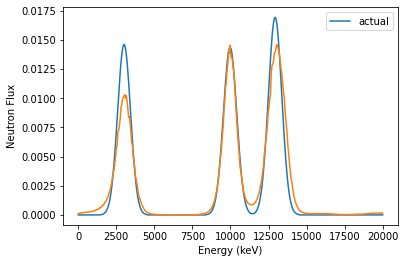

In [63]:
i = 5
plt.plot(np.linspace(1, 20000, 400), ytest[i], label = "actual")
plt.plot(np.linspace(1, 20000, 400), model(xtest)[i])
plt.xlabel("Energy (keV)")
plt.ylabel("Neutron Flux")
plt.legend()

(0.31446540880503143, 30.0)

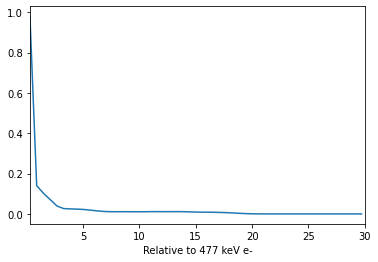

In [24]:
plt.plot(data["bins"], xtest[2])
plt.xlabel("Relative to 477 keV e-")
plt.xlim(150 / 477, 30)

In [26]:
150 / 477

0.31446540880503143

In [25]:
data["bins"]

array([ 0.30099,  0.90097,  1.50095,  2.10093,  2.70091,  3.30089,
        3.90087,  4.50085,  5.10083,  5.70081,  6.30079,  6.90077,
        7.50075,  8.10073,  8.70071,  9.30069,  9.90067, 10.50065,
       11.10063, 11.70061, 12.30059, 12.90057, 13.50055, 14.10053,
       14.70051, 15.30049, 15.90047, 16.50045, 17.10043, 17.70041,
       18.30039, 18.90037, 19.50035, 20.10033, 20.70031, 21.30029,
       21.90027, 22.50025, 23.10023, 23.70021, 24.30019, 24.90017,
       25.50015, 26.10013, 26.70011, 27.30009, 27.90007, 28.50005,
       29.10003, 29.70001])

Text(0.5, 0, 'keVee')

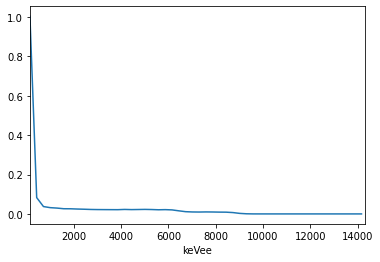

In [22]:
plt.plot(477 * data["bins"], xtest[-2])
plt.xlim(150, 30 * 477)
plt.xlabel("keVee")

In [48]:
len(data.keys())

401

In [14]:
data["bins"]

array([ 0.30099,  0.90097,  1.50095,  2.10093,  2.70091,  3.30089,
        3.90087,  4.50085,  5.10083,  5.70081,  6.30079,  6.90077,
        7.50075,  8.10073,  8.70071,  9.30069,  9.90067, 10.50065,
       11.10063, 11.70061, 12.30059, 12.90057, 13.50055, 14.10053,
       14.70051, 15.30049, 15.90047, 16.50045, 17.10043, 17.70041,
       18.30039, 18.90037, 19.50035, 20.10033, 20.70031, 21.30029,
       21.90027, 22.50025, 23.10023, 23.70021, 24.30019, 24.90017,
       25.50015, 26.10013, 26.70011, 27.30009, 27.90007, 28.50005,
       29.10003, 29.70001])